# Problem 5

## Part 1

1. Take a sample of twenty random points uniformly from the unit square in $\Bbb R^2$.
1. (That is, sample numbers $(x_i,y_i)$ from the uniform distribution $U([0,1])$to obtain ordered pairs $(x_i,y_i,...), i=1,2,...,20$
1. Select six of these points (say, $i = 1,2,...,6$) and find the least squares best fit polynomials of degrees one through six to that subset of six points. 
1. Plot the polynomial on a scatter plot of the points. 
1. What are the (mean squared) error of each model against those six points you used to build the model? 
1. What is the (mean squared) prediction error of each polynomial to the set of all twenty points? 
1. Repeat a couple of times to see how robust the results seem.

### Imports and Globals

In [1]:
from math import sqrt, sin, pi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

from importlib import reload

N_SAMPLES=20
N_TRAIN=12

N_ITERATIONS=10

### Import Utility Module

In [2]:
import sci_kit_learn_utils.utils as scu
reload(scu)

<module 'sci_kit_learn_utils.utils' from '/home/digital-tenebrist/ms-data-science/math-637/udel-math-637/utils/sci_kit_learn_utils/utils.py'>

### Set Up Model

1. Draw raw sample N_SAMPLES from specified uniform distribution
1. Draw random list of indices between 0,...,N_SAMPLES non-inclusive of end of range
1. Grab those data points from raw sample
1. Fit linear regression model against smaller sample

In [3]:
raw=np.random.uniform(0.0,1.0,(N_SAMPLES,2))
indices=np.random.choice(list(range(N_SAMPLES)),N_TRAIN, replace=False)
points_in_use=raw[indices]

X=points_in_use[:,0].reshape(-1,1)
Y=points_in_use[:,1]

model = LR().fit(X,Y)
model.score(X,Y)

0.05233793560054689

### Plot Model

1. Plot model along with N_TRAIN points scattered

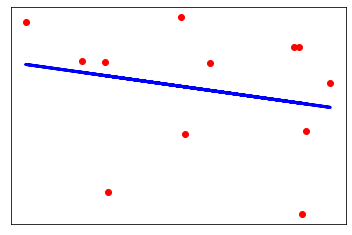

In [4]:
y_pred = model.predict(X)

plt.scatter(X, Y,  color='red')
plt.plot(X, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Mean Square Error

1. Against N_TRAIN points
1. Against all N_SAMPLE points

In [5]:
print('BEFORE PERTURBATION')

print(f'Mean squared error: {N_TRAIN} points (train) {mean_squared_error(Y, y_pred):0.3f}')
Y_pred=model.predict(raw[:,1].reshape(-1,1))
print(f'Mean squared error: {N_SAMPLES} points (all) {mean_squared_error(raw[:,1], Y_pred):0.3f}')

BEFORE PERTURBATION
Mean squared error: 12 points (train) 0.076
Mean squared error: 20 points (all) 0.136


### Discussion - Part 1

1. Squared error jumps around on various runs.
1. $R^2$ jumps around as well.
1. Results do not appear "robust".

## Part 2

1. Perturb your polynomial models a little bit: add small, random values $\epsilon ∼ N(0,s^2 )$ to the coefficients, where $s^2$ is chosen to be roughly one tenth of the coefficient. 
1. What is the prediction error on this perturbed polynomial for the six points used to build the model? 
1. For the full twenty points? 
1. Do this a few times. 
1. Would you say these perturbed models are better or worse than the one you started with?

In [6]:
std=sqrt(abs(model.coef_/10.0))
error=scu.draw_normal_sample(1,std)
model.coef_ += error[0][0]

print('AFTER PERTURBATION')
y_pred = model.predict(X)
print(f'Mean squared error: {N_TRAIN} points (train) {mean_squared_error(Y, y_pred):0.3f}')
Y_pred=model.predict(raw[:,1].reshape(-1,1))
print(f'Mean squared error: {N_SAMPLES} points (all) {mean_squared_error(raw[:,1], Y_pred):0.3f}')

AFTER PERTURBATION
Mean squared error: 12 points (train) 0.092
Mean squared error: 20 points (all) 0.186


### Discussion - Part 2

1. The small bit of noise being added into coefficent is insufficient to make it better or worse
1. Drawing from 0 mean small variance distribution, and coefficients learned from OLS are inside $[0,1]$
1. Don't expect much difference or instability.
1. To achieve that, will require different mean and/or larger variance

## Part 3

1. Repeat these two exercises with the points $x_i ∼ U[0,1]$ and $y_i ∼ N(x_i,0.1), i = 1,2,...,20$.

In [7]:
p3_verbose=False

p3_std=sqrt(0.1)
p3_err_tuple_list = list()

for i in range(N_ITERATIONS):
    p3_x_raw=np.random.uniform(0.0,1.0,(N_SAMPLES,1))
    p3_y_raw=np.random.normal(0.0,p3_std,(N_SAMPLES,1))
    indices=np.random.choice(list(range(N_SAMPLES)),N_TRAIN, replace=False)
    p3_x_train=p3_x_raw[indices].reshape(-1,1)
    p3_y_train=p3_y_raw[indices]
    
    p3_model = LR().fit(p3_x_train,p3_y_train)
    p3_model.score(p3_x_train,p3_y_train)
        
    p3_y_pred = p3_model.predict(p3_x_train)
    p3_raw_pred=p3_model.predict(p3_x_raw.reshape(-1,1))

    t1=mean_squared_error(p3_y_train, p3_y_pred)
    t2=mean_squared_error(p3_y_raw, p3_raw_pred)

    if p3_verbose:
        print(f'PART 3 ({i}) - BEFORE PERTURBATION')
        print(f'  Mean squared error: {N_TRAIN} points (train) {t1:0.3f}')
        print(f'  Mean squared error: {N_SAMPLES} points (all) {t2:0.3f}')
    
    std=sqrt(abs(p3_model.coef_/10.0))
    error=scu.draw_normal_sample(1,std)
    p3_model.coef_ += error[0][0]
    
    p3_y_pred = p3_model.predict(p3_x_train)
    p3_raw_pred=p3_model.predict(p3_x_raw.reshape(-1,1))

    t3=mean_squared_error(p3_y_train, p3_y_pred)
    t4=mean_squared_error(p3_y_raw, p3_raw_pred)

    if p3_verbose:
        print('PART 3 - AFTER PERTURBATION')
        print(f'  Mean squared error: {N_TRAIN} points (train) {t3:0.3f}')
        print(f'  Mean squared error: {N_SAMPLES} points (all) {t4:0.3f}')

    p3_err_tuple_list.append((t1,t2,t3,t4))

#### Plot Part 3

In [8]:
# t_p -> train data pre perturbation
# a_p -> all data pre perturbation
# t_a -> train data after perturbation
# a_a -> all data after perturbation

p3_df = pd.DataFrame(p3_err_tuple_list, columns =['t_p', 'a_p', 't_a', 'a_a'])
p3_df

,t_p,a_p,t_a,a_a
0,0.069755,0.061807,0.070271,0.061483
1,0.051618,0.144489,0.051861,0.136150
2,0.100671,0.105448,0.101215,0.107152
3,0.076253,0.077318,0.097668,0.097570
4,0.094581,0.101957,0.096620,0.108282
5,0.140438,0.130652,0.140439,0.130652
6,0.096256,0.088893,0.096556,0.086537
7,0.146470,0.138230,0.156410,0.118623
8,0.098484,0.117669,0.164359,0.148699
9,0.058672,0.123000,0.095230,0.255497


<AxesSubplot:title={'center':'MSE: All Data Pre/Post Perturbation'}>

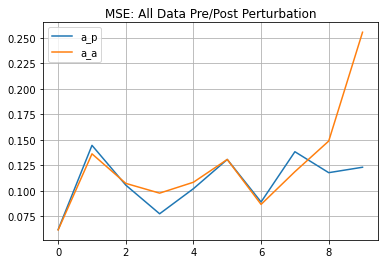

In [9]:
params={
    'title': 'MSE: All Data Pre/Post Perturbation',
    'grid':True
}

s_df=p3_df[['a_p', 'a_a']]
s_df.plot(**params)

<AxesSubplot:title={'center':'MSE: Train Data Pre/Post Perturbation'}>

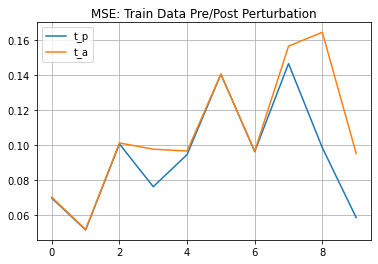

In [10]:
params={
    'title': 'MSE: Train Data Pre/Post Perturbation',
    'grid':True
}

s_df=p3_df[['t_p', 't_a']]
s_df.plot(**params)

### Discussion Part 3

1. Same comments are for Part 2 discussion

## Part 4

1. Repeat again with the points $(x_i,y_i) = (i/21, i/21 + 0.1*sin(\pi∗i/10)), i = 1,2,...,20$. 
1. What do you observe?
1. What if, instead of fitting with $i = 1,2,...,6$ you choose $i = 3,6,..,18$?

In [11]:
p4_verbose=False

p4_std=sqrt(0.1)
p4_err_tuple_list = list()

p4_x_raw=np.array([i/21.0 for i in range(1,21)])
p4_y_raw=np.array([(i/21.0) + sin(pi*i/21.0) for i in range(1,21)])

for i in range(N_ITERATIONS):
    indices=np.random.choice(list(range(N_SAMPLES)),N_TRAIN, replace=False)
    p4_x_train=p4_x_raw[indices].reshape(-1,1)
    p4_y_train=p4_y_raw[indices]
    
    p4_model = LR().fit(p4_x_train,p4_y_train)
    p4_model.score(p4_x_train,p4_y_train)
        
    p4_y_pred = p4_model.predict(p4_x_train)
    p4_raw_pred=p4_model.predict(p4_x_raw.reshape(-1,1))

    t1=mean_squared_error(p4_y_train, p4_y_pred)
    t2=mean_squared_error(p4_y_raw, p4_raw_pred)

    if p4_verbose:
        print(f'PART 4 ({i}) - BEFORE PERTURBATION')
        print(f'  Mean squared error: {N_TRAIN} points (train) {t1:0.3f}')
        print(f'  Mean squared error: {N_SAMPLES} points (all) {t2:0.3f}')
    
    std=sqrt(abs(p4_model.coef_/10.0))
    error=scu.draw_normal_sample(1,std)
    p4_model.coef_ += error[0][0]
    
    p4_y_pred = p4_model.predict(p4_x_train)
    p4_raw_pred=p4_model.predict(p4_x_raw.reshape(-1,1))

    t3=mean_squared_error(p4_y_train, p4_y_pred)
    t4=mean_squared_error(p4_y_raw, p4_raw_pred)

    if p4_verbose:
        print('PART 4 - AFTER PERTURBATION')
        print(f'  Mean squared error: {N_TRAIN} points (train) {t3:0.3f}')
        print(f'  Mean squared error: {N_SAMPLES} points (all) {t4:0.3f}')

    p4_err_tuple_list.append((t1,t2,t3,t4))

#### Plot Part 4

In [12]:
# t_p -> train data pre perturbation
# a_p -> all data pre perturbation
# t_a -> train data after perturbation
# a_a -> all data after perturbation

p4_df = pd.DataFrame(p4_err_tuple_list, columns =['t_p', 'a_p', 't_a', 'a_a'])
p4_df

,t_p,a_p,t_a,a_a
0,0.061761,0.093306,0.205813,0.178302
1,0.083820,0.081016,0.182782,0.165217
2,0.090999,0.080748,0.147690,0.140456
3,0.102741,0.082888,0.106087,0.091949
4,0.070324,0.080473,0.081297,0.094388
5,0.048478,0.093006,0.055542,0.095115
6,0.038747,0.115078,0.041287,0.112295
7,0.089369,0.082252,0.179861,0.153878
8,0.084767,0.081351,0.093824,0.083032
9,0.103258,0.080503,0.106637,0.081320


<AxesSubplot:title={'center':'MSE: All Data Pre/Post Perturbation'}>

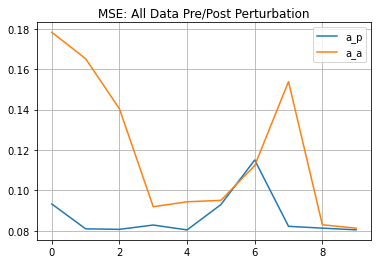

In [13]:
params={
    'title': 'MSE: All Data Pre/Post Perturbation',
    'grid':True
}

s_df=p4_df[['a_p', 'a_a']]
s_df.plot(**params)

<AxesSubplot:title={'center':'MSE: Train Data Pre/Post Perturbation'}>

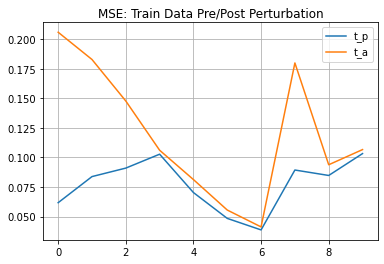

In [14]:
params={
    'title': 'MSE: Train Data Pre/Post Perturbation',
    'grid':True
}

s_df=p4_df[['t_p', 't_a']]
s_df.plot(**params)

### Part 4 Discussion

1. Rather than have variation in the inputs, they are deterministic
1. Variance increases after perturbation of the model
1. What is the key element to take away here?

## Part 5

1. How ”good” are the different models? 
1. How robust do they seem to perturbation?
    1. This is a question about opinion, based on what you observe and know about the underlying system.

### Part 5 Discussion

1. Review the outputs and make up some story for them tomorrow
1. Then pick up on the next set of exercises